In [3]:
import pandas
%matplotlib notebook 

In [6]:
with open("data/data_RE_nitrides_PBE.txt", 'r') as f:
    lines = f.readlines()
data = []
for line in lines:
    if 'atom' in line:
        cs = line.split(' ')
        columns = []
        for item in cs:
            if item not in ['', '#', '\n']:
                columns.append(item)
    if '#' not in line:
        data.append(line.strip().split(' '))
columns
data
DF = pandas.DataFrame(data, columns = columns)
DF.set_index('atom', inplace=True)
DF.index.name = None
DF = DF.apply(pandas.to_numeric, errors='coerce')

In [7]:
DF['ref'] = DF[['VASP','VLab']].mean(1)
DF

,Z,exp,VASP,ONCVPSP,VLab,JTH,ref
La,57,5.290,5.265,5.252,NaN,NaN,5.2650
Ce,58,5.000,5.220,5.241,5.236,5.230,5.2280
Pr,59,5.150,5.159,5.171,5.169,5.203,5.1640
Nd,60,5.120,5.106,5.113,5.110,5.143,5.1080
Pm,61,NaN,5.051,5.061,5.058,5.091,5.0545
Sm,62,5.048,5.012,5.012,5.012,5.044,5.0120
Eu,63,5.007,4.968,4.970,4.971,5.011,4.9695
Gd,64,4.999,4.924,NaN,4.928,4.972,4.9260
Tb,65,4.933,4.888,4.890,4.887,4.902,4.8875
Dy,66,4.905,4.853,4.854,4.853,4.896,4.8530


In [12]:
print(type(DF.loc["La"]))

<class 'pandas.core.series.Series'>


<IPython.core.display.Javascript object>


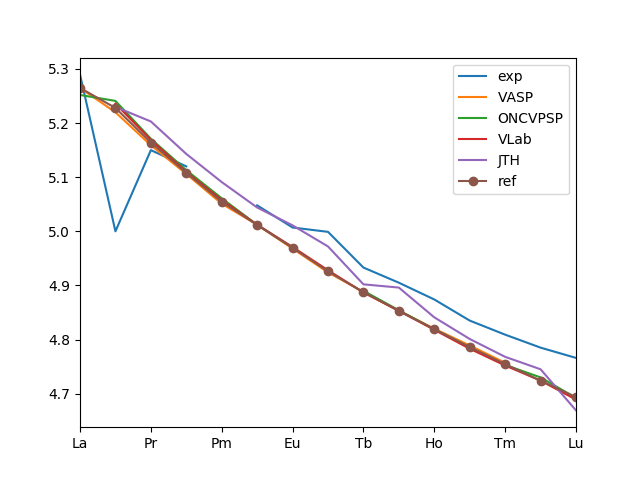

In [10]:
ax = DF[['exp','VASP','ONCVPSP','VLab','JTH']].plot()
DF[['ref']].plot(ax=ax, marker='o')

In [13]:
DF[['Z', 'ref']].to_json('Lantanide_Nitride_Rocksalt_reference.json', indent=2)